In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("max_colwidth", 400)

import json


Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
487,application_1632762077345_0489,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
path_raw = 's3://mist-secorapp-production/ap-events/ap-events-production/dt=2021-11-*/*'
ap_raw = sc.sequenceFile(path_raw)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
oc_raw = ap_raw.map(lambda x: json.loads(x[1]))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
data_list = oc_raw.filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name'] in ('SW_MAC_LIMIT_EXCEEDED')).collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
df.groupby(['switch_id']).size().sort_values(ascending=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

switch_id
b8c253024133    6967
b033a674b68c    6767
2c21311e55d2     409
e030f958b313      63
00cc34bb5ab9      31
8403280fd3de      26
a4e11a439003      25
fc9643c1df25      20
e030f958ba5a      15
28a24b810ff7       7
e45d37608d80       1
dtype: int64

In [11]:
data_list = oc_raw.filter(lambda x: x.get("switch_id") == "2c21311e55d2").filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name'] in ('SW_MAC_LIMIT_EXCEEDED')).collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      event_type                               site_id  \
0  device_events  4a93294a-9f4a-409c-9a39-05f65e97a130   
1  device_events  4a93294a-9f4a-409c-9a39-05f65e97a130   
2  device_events  4a93294a-9f4a-409c-9a39-05f65e97a130   
3  device_events  4a93294a-9f4a-409c-9a39-05f65e97a130   
4  device_events  4a93294a-9f4a-409c-9a39-05f65e97a130   

                                 org_id         timestamp device_type  \
0  94efbafe-780f-45c3-adeb-82a7eb65b3c3  1636527660000000      switch   
1  94efbafe-780f-45c3-adeb-82a7eb65b3c3  1636527677000000      switch   
2  94efbafe-780f-45c3-adeb-82a7eb65b3c3  1636527715000000      switch   
3  94efbafe-780f-45c3-adeb-82a7eb65b3c3  1636527762000000      switch   
4  94efbafe-780f-45c3-adeb-82a7eb65b3c3  1636527771000000      switch   

      switch_id                            source.org  \
0  2c21311e55d2  94efbafe-780f-45c3-adeb-82a7eb65b3c3   
1  2c21311e55d2  94efbafe-780f-45c3-adeb-82a7eb65b3c3   
2  2c21311e55d2  94efbafe-780f-45c3-adeb-

In [13]:
a = df['source.detail'].unique()
a

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: c8:d9:d2:24:8b:13\n',
       'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: c8:d9:d2:24:90:94\n',
       'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: c8:d9:d2:24:94:05\n',
       'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: 00:04:f2:db:ac:7c\n',
       'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: 00:04:f2:db:a4:91\n',
       'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac

In [14]:
b = df['source.port_id'].unique()
b

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['ge-0/0/0'], dtype=object)

In [15]:
data_list[0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'event_type': 'device_events', 'site_id': '4a93294a-9f4a-409c-9a39-05f65e97a130', 'org_id': '94efbafe-780f-45c3-adeb-82a7eb65b3c3', 'timestamp': 1636527660000000, 'source': {'org': '94efbafe-780f-45c3-adeb-82a7eb65b3c3', 'site': '4a93294a-9f4a-409c-9a39-05f65e97a130', 'mac': '2c21311e55d2', 'model': 'EX3400-48P', 'ev_name': 'SW_MAC_LIMIT_EXCEEDED', 'fw_version': '18.2R3-S2.9', 'version': 1, 'ev_ts': 1636527660, 'port_id': 'ge-0/0/0', 'detail': 'L2ALD_MAC_LIMIT_EXCEEDED_IF: Limit on learned MAC addresses exceeded for ge-0/0/0.0; current count is 4 DROPPING THE PACKET with mac address: c8:d9:d2:24:8b:13\n', 'client': 'c8-d9-d2-24-8b-13', 'device_type': 'switch'}, 'device_type': 'switch', 'switch_id': '2c21311e55d2'}

In [16]:
df['date'] = pd.to_datetime(df['timestamp']/1000, unit='ms')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
from datetime import datetime

df['time'] = df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
df['time'].head(5)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    07:01:00
1    07:01:17
2    07:01:55
3    07:02:42
4    07:02:51
Name: time, dtype: object

In [19]:
viz_series = df.groupby(['time']).size().sort_values(ascending=False)
viz_df = pd.DataFrame({'time':viz_series.index, 'count':viz_series.values})
viz_df = viz_df.sort_values('time')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
viz_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         time  count
111  07:00:47      1
3    07:00:48      5
202  07:00:49      1
18   07:00:50      3
203  07:00:56      1

In [21]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

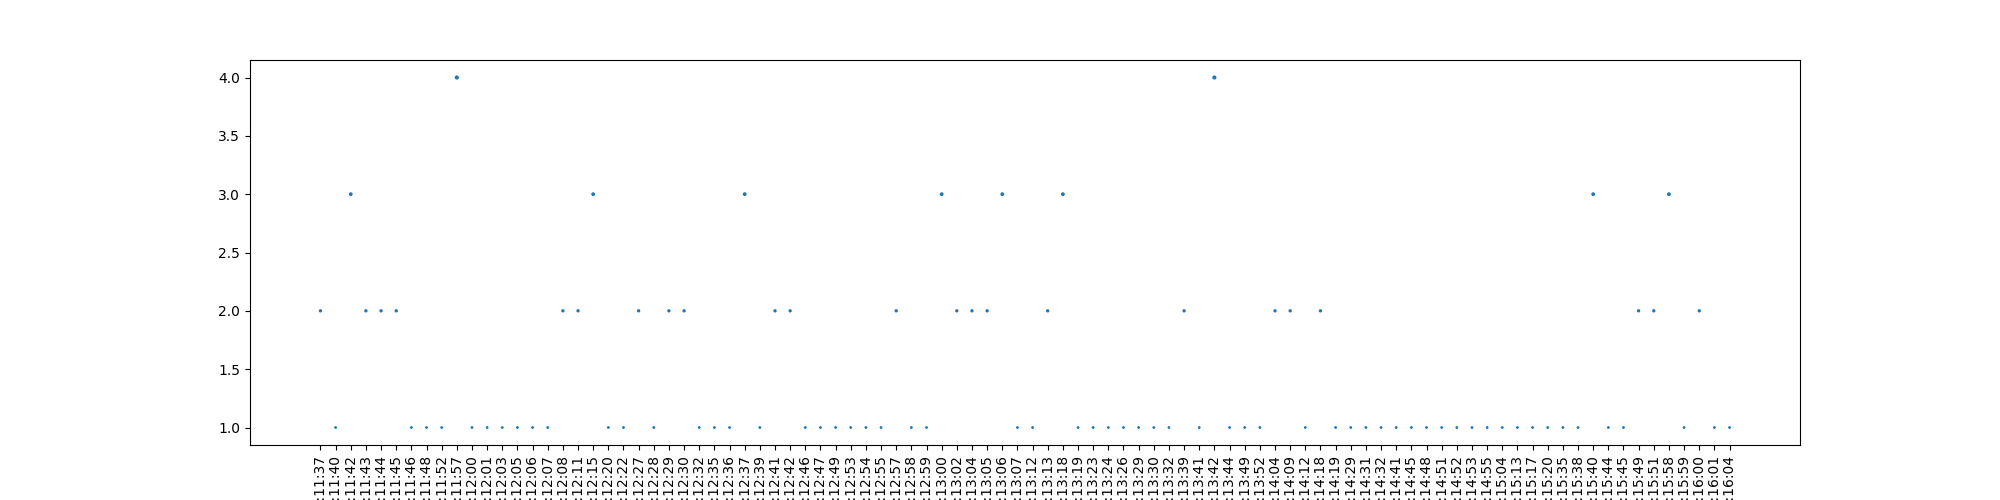

In [22]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=viz_df['time'][200:300], y=viz_df['count'][200:300], s=viz_df['count'][200:300])


plt.show()
%matplot plt

In [23]:
date_series = df.groupby(['date']).size().sort_values(ascending=False)
date_df = pd.DataFrame({'date':date_series.index, 'count':date_series.values})
date_df = date_df.sort_values('date')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
111 2021-11-10 07:00:47      1
3   2021-11-10 07:00:48      5
202 2021-11-10 07:00:49      1
18  2021-11-10 07:00:50      3
203 2021-11-10 07:00:56      1

In [25]:
clone_df = date_df[['date', 'count']].copy()
clone_df = clone_df.set_index('date').resample('10min').sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
clone_df.index.name = 'date'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
clone_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     count
date                      
2021-11-10 07:00:00    235
2021-11-10 07:10:00    174

In [28]:
clone_df['date'] = clone_df.index

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
clone_df['time'] = clone_df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

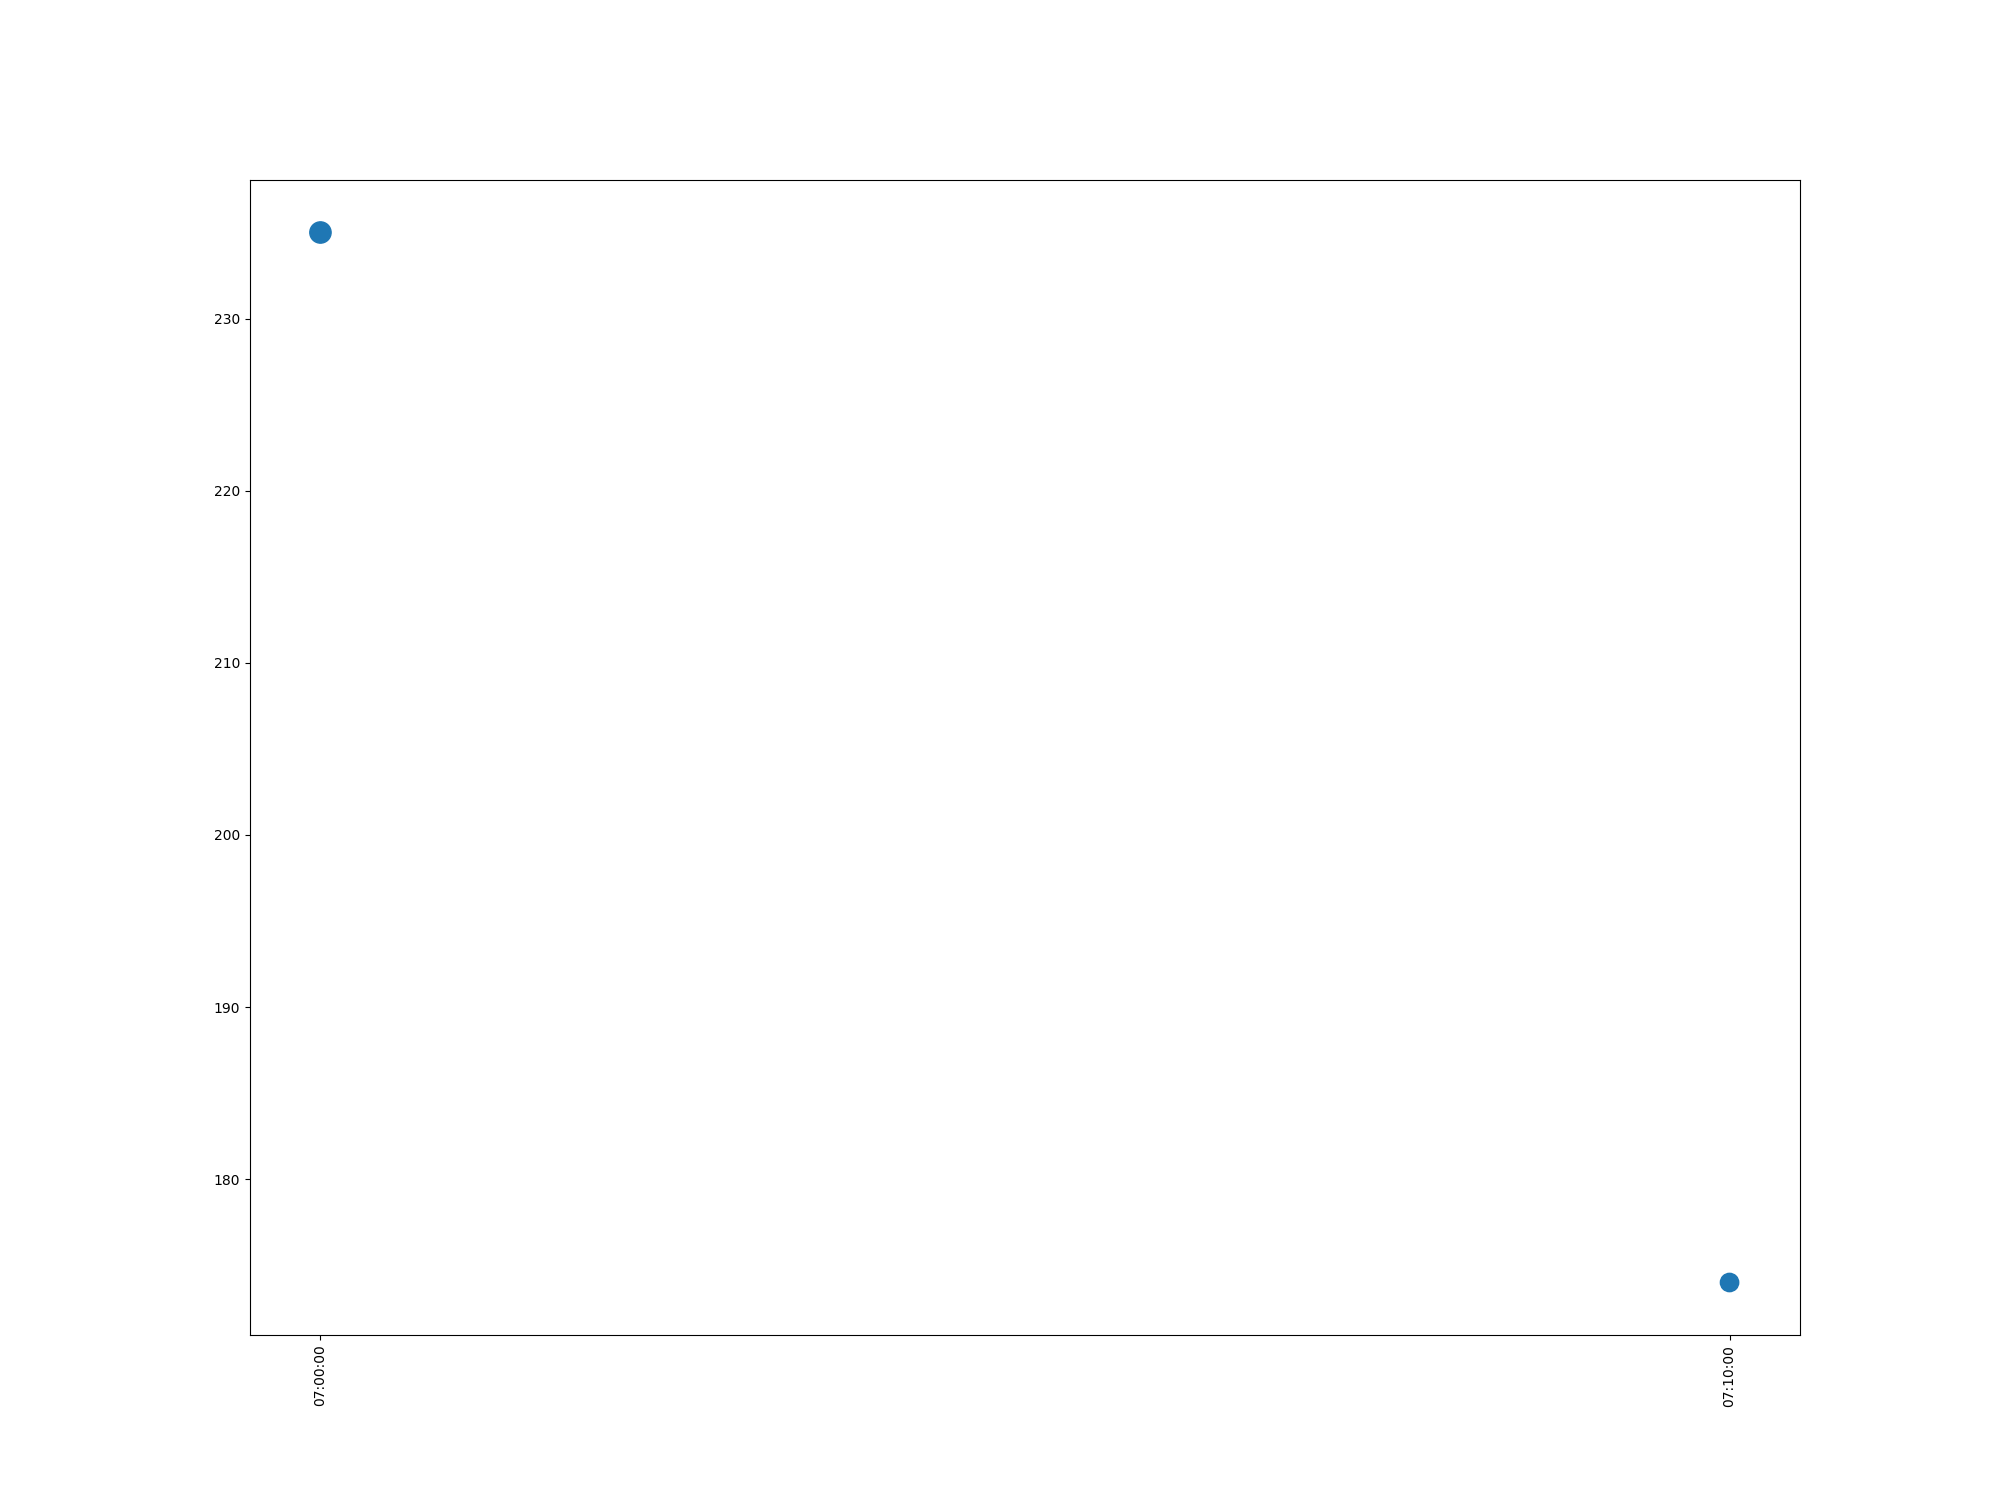

In [31]:
plt.figure(figsize=(20,15))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=clone_df['time'], y=clone_df['count'], s=clone_df['count'])


plt.show()
%matplot plt

In [32]:
max(clone_df['count'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

235

In [33]:
clone_df['count'].mean()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

204.5

In [34]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
111 2021-11-10 07:00:47      1
3   2021-11-10 07:00:48      5
202 2021-11-10 07:00:49      1
18  2021-11-10 07:00:50      3
203 2021-11-10 07:00:56      1

In [35]:
date_df['time_delta'] = date_df['date'] - date_df['date'].shift()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count      time_delta
111 2021-11-10 07:00:47      1             NaT
3   2021-11-10 07:00:48      5 0 days 00:00:01
202 2021-11-10 07:00:49      1 0 days 00:00:01
18  2021-11-10 07:00:50      3 0 days 00:00:01
203 2021-11-10 07:00:56      1 0 days 00:00:06

In [37]:
time_delta_series = date_df.groupby(['time_delta']).size().sort_values(ascending=False)
delta_df = pd.DataFrame({'time_delta':time_delta_series.index, 'count':time_delta_series.values})
delta_df = delta_df.sort_values('time_delta')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
delta_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       time_delta  count
0 0 days 00:00:01     99
1 0 days 00:00:02     54
2 0 days 00:00:03     46
3 0 days 00:00:04     26
4 0 days 00:00:05     22

In [39]:
plt.clf()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

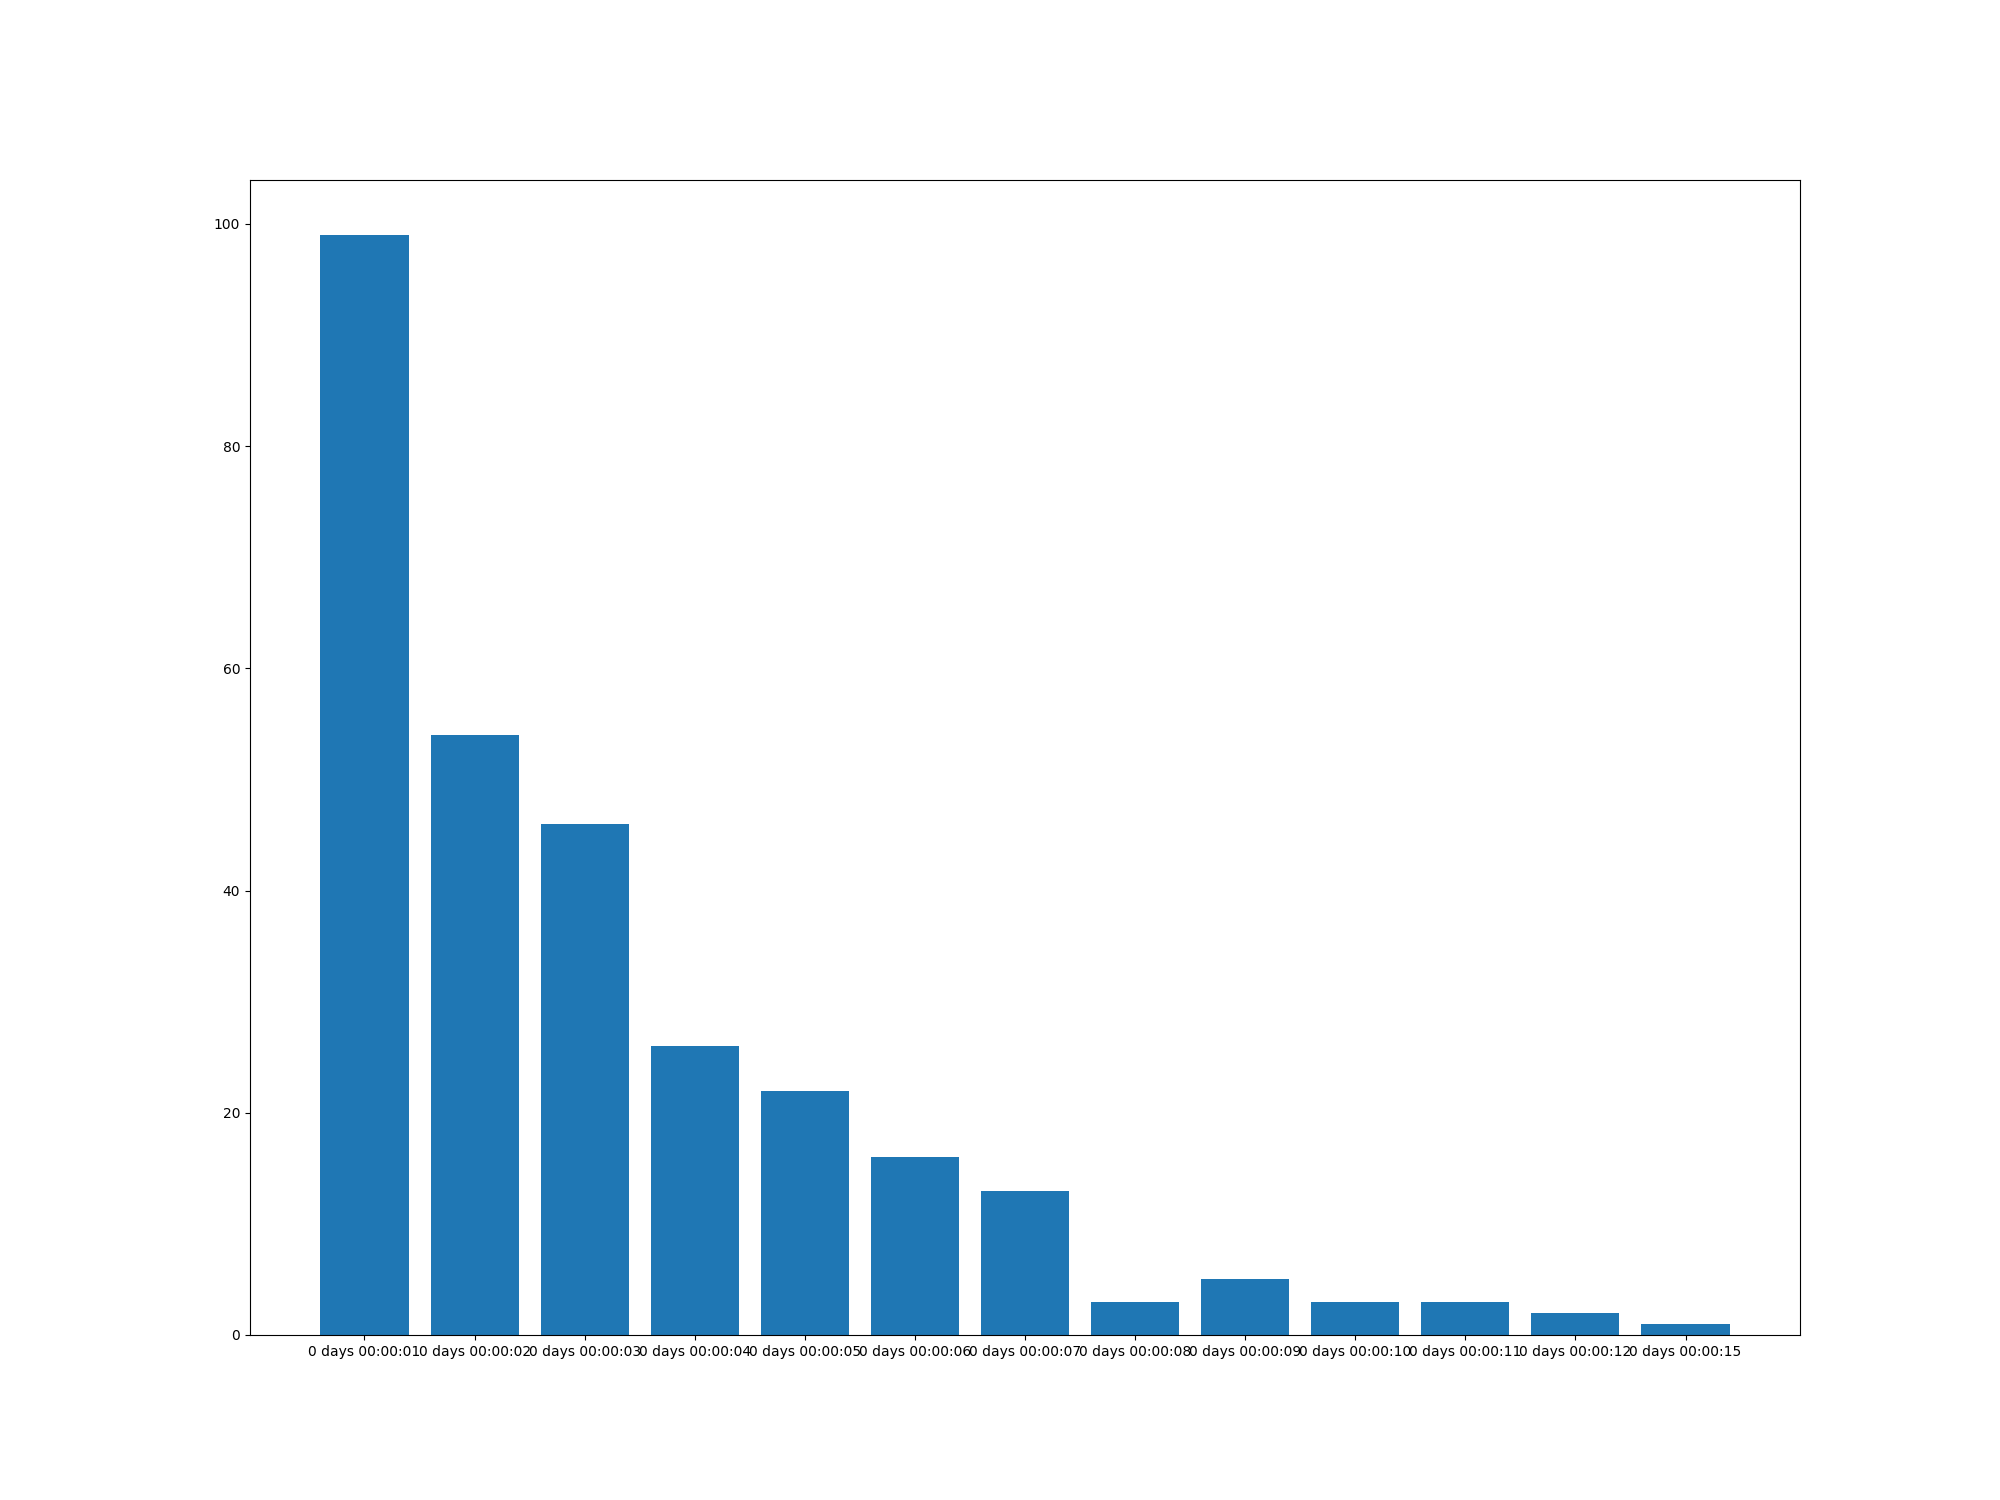

In [40]:
plt.figure(figsize=(20,15))
plt.bar(delta_df['time_delta'].astype(str),delta_df['count'])
plt.show()

%matplot plt